In [1]:
import numpy as np
from scipy import integrate

def f1(x):
    return x**2/4

def f2(x):
    return (6 - x**2)/2

a = -2
b = 2  

area = integrate.quad(lambda x: min(f1(x), f2(x)), a, b)[0]

print(area)

1.3333333333333333


In [2]:
from sympy import * 

x = symbols('x')

f1 = x**2/4  
f2 = (6 - x**2)/2  

a = -2
b = 2

area = integrate(Min(f1, f2), (x, a, b))

print(area)

4/3


In [ ]:
from sympy import *
from scipy.optimize import fsolve

x = symbols('x')

f1 = x**2/4
f2 = (6 - x**2)/2

solutions = solve(f1 - f2, x)  

x1 = float(solutions[0])
x2 = float(solutions[1])

def myf1(x):
    return x**2/4

def myf2(x):
    return (6 - x**2)/2

from scipy import integrate

lower_limit = min(x1, x2)
upper_limit = max(x1, x2)

area = integrate.quad(lambda x: min(myf1(x), myf2(x)), lower_limit, upper_limit)[0]

print(area)

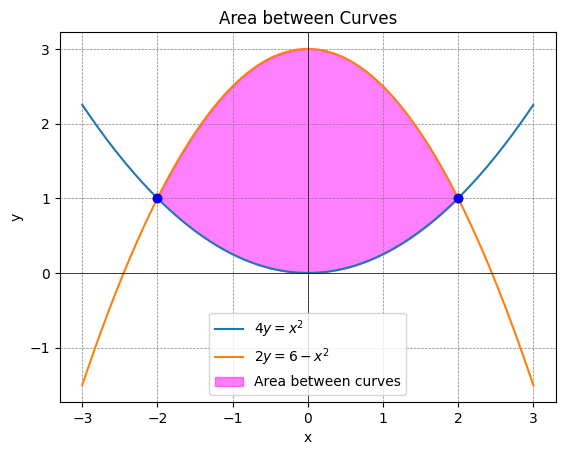

The area between the curves is: -8.00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from sympy import symbols, Eq, solve

# Define the functions representing the curves
def curve1(x):
    return x**2 / 4

def curve2(x):
    return (6 - x**2) / 2

# Find the intersection points of the curves

x, y = symbols('x y')
eq1 = Eq(4 * y, x**2)
eq2 = Eq(2 * y, 6 - x**2)

intersection_points = solve((eq1, eq2), (x, y))
intersection_x_values = [float(point[0]) for point in intersection_points]

# Define the integration limits based on the intersection points
x_limits = np.linspace(min(intersection_x_values), max(intersection_x_values), 100)

# Define the area calculation function
def area_between_curves(x):
    return curve1(x) - curve2(x)

# Calculate the area using quad function from SciPy
area, _ = quad(area_between_curves, min(intersection_x_values), max(intersection_x_values))

# Plot the curves
x = np.linspace(-3, 3, 400)
plt.plot(x, curve1(x), label=r'$4y = x^2$')
plt.plot(x, curve2(x), label=r'$2y = 6 - x^2$')

# Fill the area between the curves
plt.fill_between(x_limits, curve1(x_limits), curve2(x_limits), color='magenta', alpha=0.5, label='Area between curves')

# Highlight the intersection points
plt.scatter(intersection_x_values, [curve1(x) for x in intersection_x_values], color='red', zorder=5)
plt.scatter(intersection_x_values, [curve2(x) for x in intersection_x_values], color='blue', zorder=5)

# Set plot labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Area between Curves')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()

print(f'The area between the curves is: {area:.2f}')


The area between the curves is: 1.124126789939942e-28


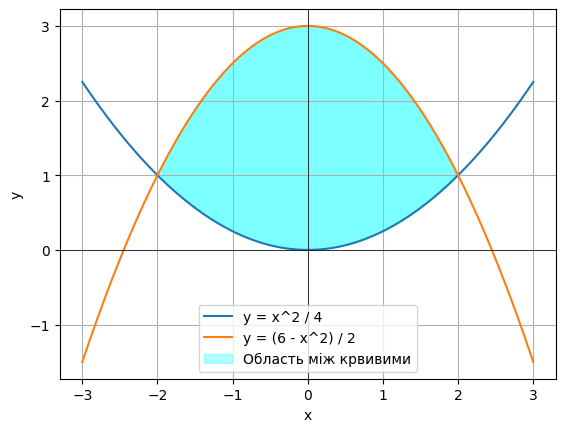

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize


def equation1(x):
    return x**2 / 4

def equation2(x):
    return (6 - x**2) / 2

# Define the function to find points of intersection
def find_intersection(func1, func2, x_guess):
    return optimize.fsolve(lambda x: func1(x) - func2(x), x_guess)

# Find points of intersection (provide an initial guess)
initial_guess = [0]
intersection_points = find_intersection(equation1, equation2, initial_guess)

# Extend the initial guess to find the second point of intersection
initial_guess.append(3)  # You may need to adjust this guess based on the problem

intersection_points = np.append(intersection_points, find_intersection(equation1, equation2, initial_guess[1]))

# Sort the intersection points
intersection_points.sort()

# Define the absolute difference between the two functions
def area_integrand(x):
    return np.abs(equation1(x) - equation2(x))

# Integrate the absolute difference over the interval defined by the intersection points
area, _ = integrate.quad(area_integrand, intersection_points[0], intersection_points[1], limit=100)

# Print the result
print(f"The area between the curves is: {area}")

# Plot the functions
x_values = np.linspace(-3, 3, 400)
y1_values = equation1(x_values)
y2_values = equation2(x_values)

plt.plot(x_values, y1_values, label='y = x^2 / 4')
plt.plot(x_values, y2_values, label='y = (6 - x^2) / 2')

# Highlight the area between the curves
plt.fill_between(x, equation1(x), equation2(x), where=(equation1(x) < equation2(x)), color='cyan', alpha=0.3, label='Область між крвивими')

plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid()
plt.legend()

plt.show()

№8.1.2
(4*y=x^2, 2*y=6-x^2)

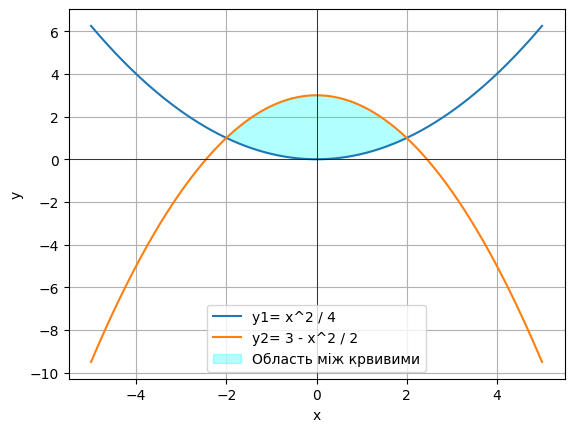

Площа: 8.0


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import quad


def y1(x):
    return x**2 / 4

def y2(x):
    return 3 - x**2 / 2



x = np.linspace(-5, 5, 400)
plt.plot(x, y1(x), label='y1= x^2 / 4')
plt.plot(x, y2(x), label='y2= 3 - x^2 / 2')

plt.fill_between(x, y1(x), y2(x), where=(y1(x) < y2(x)), color='cyan', alpha=0.3, label='Область між крвивими')

plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid()
plt.legend()

plt.show()

# знаходження таких значень x, при яких різниця між y1(x) та y2(x) дорівнює нулю, тобто, де обидві функції перетинаються.
intersection_points_x = fsolve(lambda x: y1(x) - y2(x), [-2, 2])

area, _ = quad(lambda x: np.abs(y1(x) - y2(x)), intersection_points_x[0], intersection_points_x[1]) 

print("Площа:", area)

8.2.2 ro=2+cos(phi)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


phi = np.linspace(0, 2 * np.pi, 1000)

ro = 2 + np.cos(phi)
plt.polar(phi, ro, label='r = 2 + cos(phi)', color='magenta')

# кожна точка має кут з масиву phi, починаєтсья від 0, , радіус з масиву ro
plt.fill_between(phi, 0, ro, alpha=0.2, color='magenta')
plt.title('Полярна крива')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


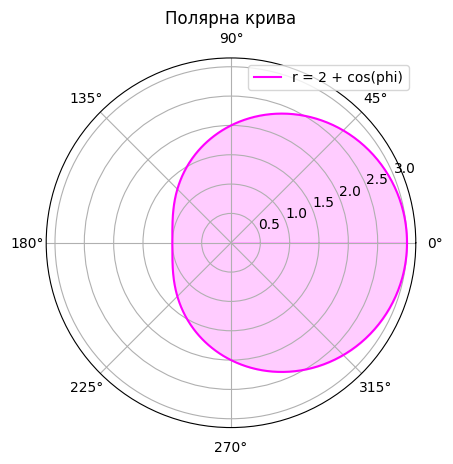

Площа: 12.566370614359172


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

def integrand(phi):
    return (2 + np.cos(phi))

alpha = 0
beta = 2 * np.pi

# Побудуйте графік
phi = np.linspace(alpha, beta, 500)
ro = 2 + np.cos(phi)
plt.polar(phi, ro, label='r = 2 + cos(phi)', color='magenta')
plt.fill_between(phi, 0, ro, alpha=0.2, color='magenta')
plt.title('Полярна крива')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

result, _ = integrate.quad(integrand, alpha, beta)
print(f'Площа: {result}')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Визначення функції для обчислення r(phi)
def polar_function(phi):
    return 2 + np.cos(phi)

# Визначення інтегрованої функції для обчислення площі
def integrand(phi):
    return 0.5 * (polar_function(phi))**2

# Обчислення площі за допомогою квадратурного методу
result, _ = quad(integrand, 0, 2 * np.pi, limit=100)

# Виведення результату
print("Площа фігури: ", result)

# Побудова графіка
phi_values = np.linspace(0, 2 * np.pi, 1000)
r_values = polar_function(phi_values)

plt.polar(phi_values, r_values, label='r = 2 + cos(phi)', color='magenta')
plt.fill_between(phi_values, 0, r_values, alpha=0.2, label=f'Площа фігури: {np.round(result, 2)}', color='magenta')
plt.title('Полярна крива')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

8.3.3 x=16*cos^3(t), y= 2 * sin^3(t), x=2 (x>=2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


t = np.linspace(0, 2 * np.pi, 1000)
x = 16 * np.cos(t)**3
y = 2 * np.sin(t)**3

plt.plot(x, y, label='x = 16 * np.cos(t)^3, y = 2 * np.sin(t)^3', color='blue')


plt.fill_between(x, y, alpha=0.2, color='blue')

plt.title('Параметрчино задана фігура')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


t = np.linspace(0, 2 * np.pi, 1000)
x = 16 * np.cos(t)**3
y = 2 * np.sin(t)**3

# x=2 де x>=2
x[x>=2] = 2

plt.plot(x, y, label='x = 16 * np.cos(t)^3, y = 2 * np.sin(t)^3', color='blue')


plt.fill_between(x, y, alpha=0.2, color='blue')

plt.title('Параметрчино задана фігура')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import sympy as sp

def y(t):
    return 2 * np.sin(t)**3

def x(t):
    return 16 * np.cos(t)**3

x_prime = sp.diff(x(t), t)

lower_limit = 0
upper_limit = 2 * np.pi

area, _ = quad((y * x_prime), lower_limit, upper_limit)
print(f'Площа фігури: {area}')

t = np.linspace(lower_limit, upper_limit, 1000)
x_values = x(t)
x_values[x_values >= 2] = 2

plt.plot(x_values, y(t), label='Parametric Curve', color='blue')
plt.fill_betweenx(y(t), x_values, alpha=0.2, color='blue', label=f"Площа: {area}")

plt.title('x=16*cos^3(t), y= 2 * sin^3(t), x=2 (x>=2)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


TypeError: loop of ufunc does not support argument 0 of type Symbol which has no callable cos method

8.4.2

y= ln(2/x), x є [sqrt(3); sqrt(8)]

In [49]:
import numpy as np
from scipy.integrate import quad
from numpy.lib.scimath import sqrt, log

# Define the function to integrate
def integrand(x):
    dy_dx = -1 / (x * log(2/x))
    return np.sqrt(1 + dy_dx**2)

# Define the interval [sqrt(3), sqrt(8)]
a, b = sqrt(3), sqrt(8)

# Perform the integration
length, error = quad(integrand, a, b, limit=100)

print(f'The length of the curve is approximately {length:.4f}')


The length of the curve is approximately 14.1619


C:\Users\Dia\AppData\Local\Temp\ipykernel_34556\3615635820.py:14: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  length, error = quad(integrand, a, b, limit=100)


8.5.2

x=2*(cos(t)+t*sin(t)), y=2*(sin(t)-t*cos(t)), 0 <= t <= pi/2

In [1]:
import numpy as np
from scipy.integrate import quad

# Parametric equations
def x(t):
    return 2 * (np.cos(t) + t * np.sin(t))

def y(t):
    return 2 * (np.sin(t) - t * np.cos(t))

# Derivatives with respect to t
def dx_dt(t):
    return 2 * (-np.sin(t) + (1 + t) * np.cos(t))

def dy_dt(t):
    return 2 * (np.cos(t) + (1 + t) * np.sin(t))

# Integrand for arc length calculation
def integrand(t):
    return np.sqrt(dx_dt(t)**2 + dy_dt(t)**2)

# Integration using quad
arc_length, error = quad(integrand, 0, np.pi)

print(f"The length of the curve is: {arc_length}")


The length of the curve is: 17.478613886644368
